# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
!pip install citipy

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Set variable for units of measurment
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | el sauzal
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | bataipora
Processing Record 8 of Set 1 | phimai
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | saint-joseph
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | poso
Processing Record 16 of Set 1 | buala
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | maues
Processing Record 19 of Set 1 | iwanai
Processing Record 20 of Set 1 | katobu
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | avarua
Processing Record 23 of Set 1 | atambua
Processing Record 24 of Se

Processing Record 39 of Set 4 | yuncheng
Processing Record 40 of Set 4 | tanete
Processing Record 41 of Set 4 | salisbury
Processing Record 42 of Set 4 | ndioum
Processing Record 43 of Set 4 | kannur
Processing Record 44 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 45 of Set 4 | trinidad
Processing Record 46 of Set 4 | bali
Processing Record 47 of Set 4 | codrington
Processing Record 48 of Set 4 | margate
Processing Record 49 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 0 of Set 5 | carutapera
Processing Record 1 of Set 5 | san vicente
Processing Record 2 of Set 5 | labutta
City not found. Skipping...
Processing Record 3 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 5 | bilma
Processing Record 5 of Set 5 | monterey
Processing Record 6 of Set 5 | tabarqah
City not found. Skipping...
Processing Record 7 of Set 5 | tombouctou
Processing Record 8 of Set 5 | jiwani
Processing Record 9 of Set 5 | erzin
Processin

Processing Record 27 of Set 8 | east lansing
Processing Record 28 of Set 8 | tulun
Processing Record 29 of Set 8 | ostrovnoy
Processing Record 30 of Set 8 | salinopolis
Processing Record 31 of Set 8 | adrar
Processing Record 32 of Set 8 | buta
Processing Record 33 of Set 8 | abiy adi
City not found. Skipping...
Processing Record 34 of Set 8 | finnsnes
Processing Record 35 of Set 8 | carroll
Processing Record 36 of Set 8 | manhattan
Processing Record 37 of Set 8 | mathathane
Processing Record 38 of Set 8 | natuba
Processing Record 39 of Set 8 | mujiayingzi
Processing Record 40 of Set 8 | lillooet
Processing Record 41 of Set 8 | san ramon
Processing Record 42 of Set 8 | pouembout
Processing Record 43 of Set 8 | amapa
Processing Record 44 of Set 8 | nador
Processing Record 45 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 46 of Set 8 | thompson
Processing Record 47 of Set 8 | omsukchan
Processing Record 48 of Set 8 | waddan
Processing Record 49 of Set 8 | turayf
Process

Processing Record 19 of Set 12 | tabuk
Processing Record 20 of Set 12 | grindavik
Processing Record 21 of Set 12 | orange cove
Processing Record 22 of Set 12 | abu samrah
Processing Record 23 of Set 12 | sao joao da barra
Processing Record 24 of Set 12 | guilin
Processing Record 25 of Set 12 | daru
Processing Record 26 of Set 12 | erenhot
Processing Record 27 of Set 12 | bambanglipuro
Processing Record 28 of Set 12 | labytnangi
Processing Record 29 of Set 12 | mikkeli
Processing Record 30 of Set 12 | aden
Processing Record 31 of Set 12 | bargarh
Processing Record 32 of Set 12 | timra
Processing Record 33 of Set 12 | emerald
Processing Record 34 of Set 12 | sassandra
Processing Record 35 of Set 12 | kodinsk
Processing Record 36 of Set 12 | peachland
Processing Record 37 of Set 12 | riyadh
Processing Record 38 of Set 12 | ballina
Processing Record 39 of Set 12 | yilan
Processing Record 40 of Set 12 | manono
Processing Record 41 of Set 12 | lamont
Processing Record 42 of Set 12 | wah
Proc

In [4]:
city_weather_json

{'coord': {'lon': 34.7668, 'lat': 64.5232},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': -7.93,
  'feels_like': -13.21,
  'temp_min': -7.93,
  'temp_max': -7.93,
  'pressure': 1032,
  'humidity': 92,
  'sea_level': 1032,
  'grnd_level': 1032},
 'visibility': 10000,
 'wind': {'speed': 3.17, 'deg': 1, 'gust': 9.4},
 'clouds': {'all': 6},
 'dt': 1680462013,
 'sys': {'country': 'RU', 'sunrise': 1680404174, 'sunset': 1680453164},
 'timezone': 10800,
 'id': 577922,
 'name': 'Belomorsk',
 'cod': 200}

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,upernavik,72.7868,-56.1549,-25.45,93,65,2.35,GL,1680462100
1,cidreira,-30.1811,-50.2056,22.80,55,13,3.54,BR,1680462101
2,jamestown,42.0970,-79.2353,5.29,34,0,1.54,US,1680461873
3,barrow,71.2906,-156.7887,-14.99,85,100,6.69,US,1680462102
4,el sauzal,31.9000,-116.6833,15.79,71,0,3.72,MX,1680462102


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,upernavik,72.7868,-56.1549,-25.45,93,65,2.35,GL,1680462100
1,cidreira,-30.1811,-50.2056,22.80,55,13,3.54,BR,1680462101
2,jamestown,42.0970,-79.2353,5.29,34,0,1.54,US,1680461873
3,barrow,71.2906,-156.7887,-14.99,85,100,6.69,US,1680462102
4,el sauzal,31.9000,-116.6833,15.79,71,0,3.72,MX,1680462102


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

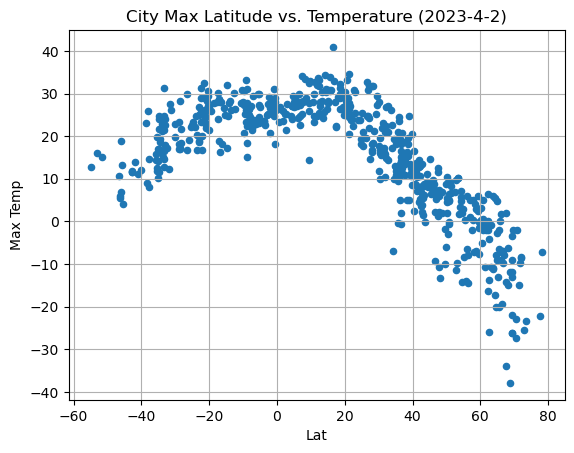

In [10]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, title="City Max Latitude vs. Temperature (2023-4-2)")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

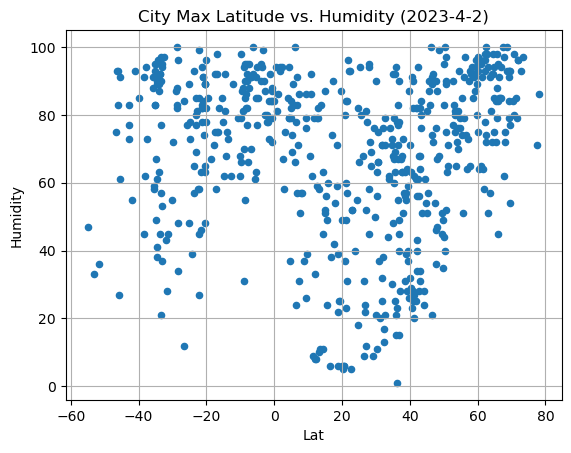

In [11]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, title="City Max Latitude vs. Humidity (2023-4-2)")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

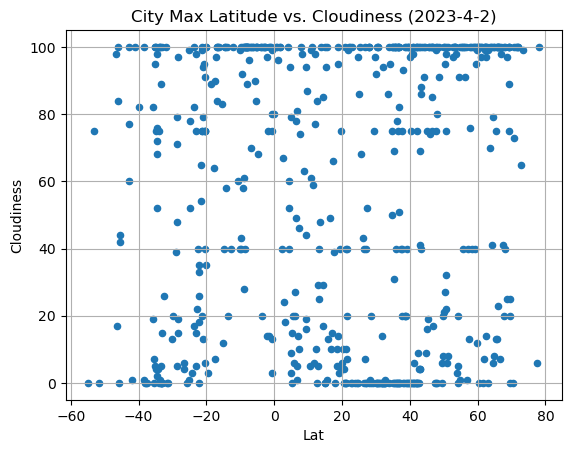

In [12]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, title="City Max Latitude vs. Cloudiness (2023-4-2)")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

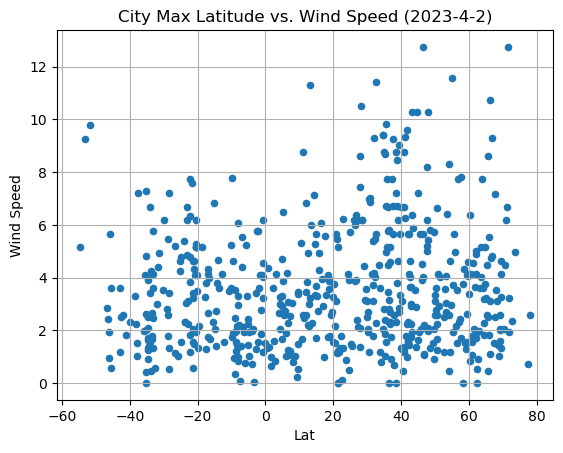

In [13]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, title="City Max Latitude vs. Wind Speed (2023-4-2)")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [82]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x, y):
    slope, inter, r, p, std_err = linregress(x, y)
    fit = slope * x + inter
    line = "y = " + str(round(slope,2)) + "x + " + str(round(inter))
    plt.scatter(x,y)
    plt.plot(x,fit,"r-")
    plt.annotate(line, (5, 0), fontsize=15,color="red")
    plt.annotate(line, (-20, 5), fontsize=15,color="red")
    print(f"The r-value is: {r}")

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
northern_hemi_df = northern_hemi_df.reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,upernavik,72.7868,-56.1549,-25.45,93,65,2.35,GL,1680462100
1,jamestown,42.0970,-79.2353,5.29,34,0,1.54,US,1680461873
2,barrow,71.2906,-156.7887,-14.99,85,100,6.69,US,1680462102
3,el sauzal,31.9000,-116.6833,15.79,71,0,3.72,MX,1680462102
4,kodiak,57.7900,-152.4072,0.39,65,76,7.81,US,1680462058


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
southern_hemi_df = southern_hemi_df.reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cidreira,-30.1811,-50.2056,22.80,55,13,3.54,BR,1680462101
1,bataipora,-22.2953,-53.2711,31.23,45,35,1.17,BR,1680462102
2,castro,-24.7911,-50.0119,22.62,73,78,1.57,BR,1680462103
3,saint-joseph,-21.3667,55.6167,24.21,82,99,3.21,RE,1680462103
4,punta arenas,-53.1500,-70.9167,16.06,33,75,9.26,CL,1680462104


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8873111693781838


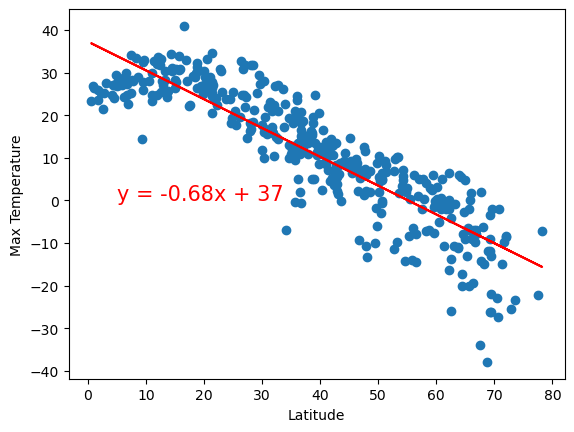

In [83]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
lin_reg_plot(x,y)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()

The r-value is: 0.6508311705456851


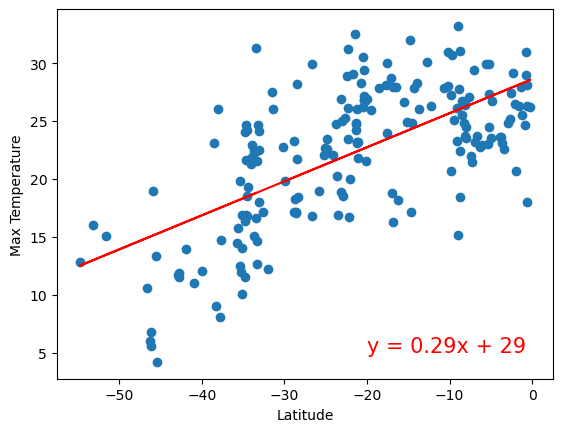

In [84]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
lin_reg_plot(x,y)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()

**Discussion about the linear relationship:** Unsurprisingly, latitude has a strong correlation to temperature. As latitude approaches 0, temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.33501688812165276


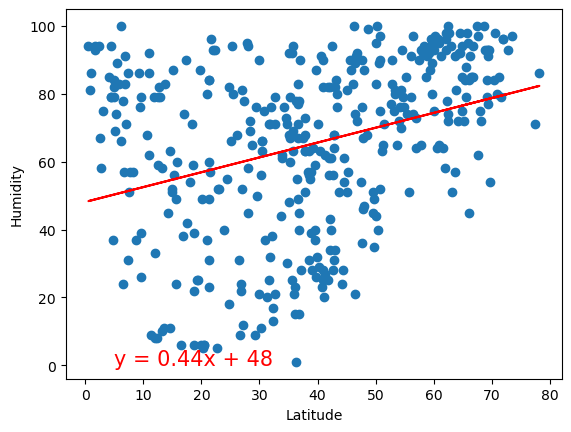

In [85]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
lin_reg_plot(x,y)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.2665411894118905


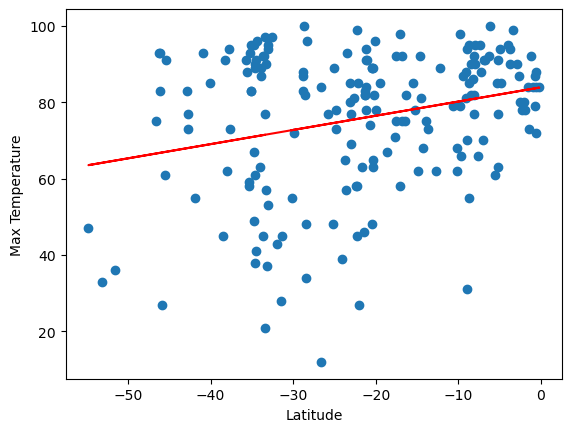

In [86]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
lin_reg_plot(x,y)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()

**Discussion about the linear relationship:** In both cases, humidity appears to correlate positively with latitude. As latitude increases, so does humidity, and both hemispheres have a weak-to-medium r-value.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.22504095670988913


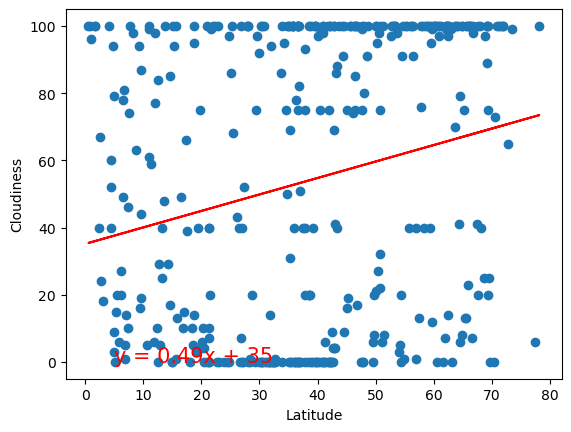

In [89]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
lin_reg_plot(x,y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.3656266071964657


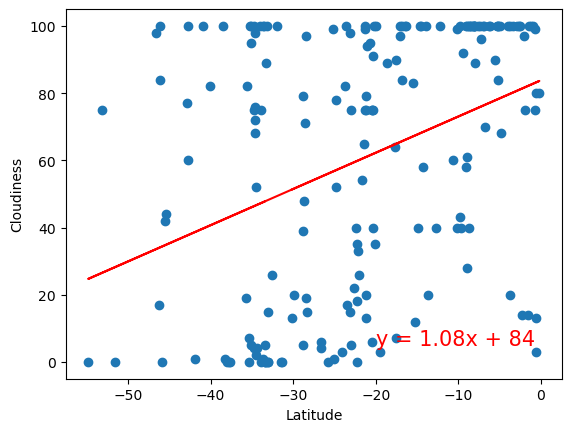

In [87]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
lin_reg_plot(x,y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** The plots for both hemispheres appear extremely varied and inconsistent, but the statistical analysis and r-value suggest a weak-to-medium correlation of increasing cloudiness as latitude increases.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07128982142586066


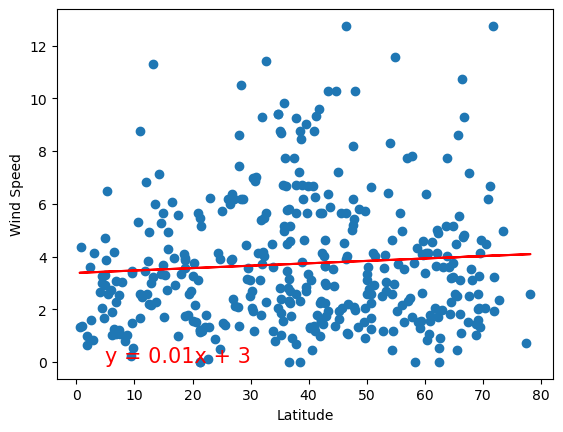

In [90]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
lin_reg_plot(x,y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.09402095062829154


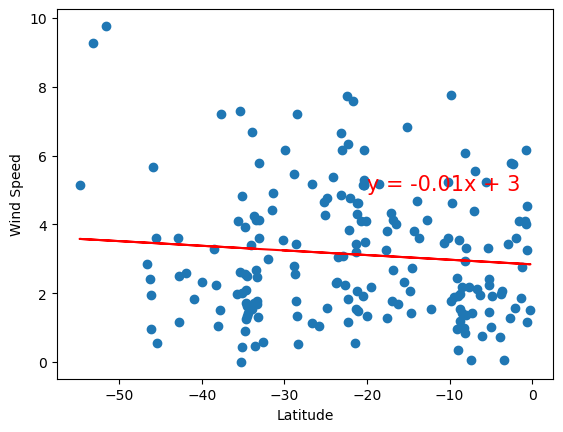

In [88]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
lin_reg_plot(x,y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** There does not appear to be much correlation between latitude and wind speed.  Both sets return a largely flat line, showing little relation overall.